In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

In [41]:
data = pd.read_csv('plants data - lavender_enhanced.csv')

In [42]:
data

,plant_name,temp,EC ds/m,light_time_day,red_light,blue_light,far_red,humidity,ph,water_times (times/day),air flow,growth_yield/m^2 (kg),Active Agents (%),Growth Time (weeks)
0,lavender,20,1.2,14,60,40,0,45,6.8,2,moderate,1.70,1.5–2.0,12
1,lavender,20,1.2,12,70,30,0,45,6.8,2,moderate,1.30,1.3–1.8,12
2,lavender,20,1.2,14,50,40,10,45,6.8,2,moderate,1.40,1.4–1.9,12
3,lavender,20,1.2,16,65,36,0,45,6.8,2,moderate,1.75,1.6–2.1,12
4,lavender,20,1.2,12,60,40,0,45,6.8,2,moderate,1.20,NaN,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Lavender,23,1.2,15,280,110,75,45–50,6.1,3,Strong,0.17,0.33,3
92,Lavender,23–24,1.5,15,300,120,80,40–45,6.1,3,Strong,0.20,0.4,4
93,Lavender,24–25,1.6,15,320,140,90,40,6.2,4,Strong,0.22,0.45,4
94,Lavender,23.5,1.55,15,310,130,85,42,6.1,3,Medium,0.21,0.43,4


# procession

In [43]:
# plants name done
# temp
data.temp.unique()

array(['20', '18-22', '22-27', '20-24', '19-23', '22-26', '22-25',
       '20-23\t', '20-26\t', '18-27\t', '21-26', '20-25', '21-23',
       '19-25', '18-26', '21-25', '18-24', '18-25', '20-26', '20-23',
       '21-24', '22', '24', '23', '25', '21', '26', '20–21', '21–22',
       '20.5', '22–23', '21.5', '23–24', '22.5', '24–25', '23.5'],
      dtype=object)

In [44]:
# delete the \t and get the extract n-n
data.temp=data.temp.apply(lambda x:x.replace('\t',''))
data['temp'].unique()

array(['20', '18-22', '22-27', '20-24', '19-23', '22-26', '22-25',
       '20-23', '20-26', '18-27', '21-26', '20-25', '21-23', '19-25',
       '18-26', '21-25', '18-24', '18-25', '21-24', '22', '24', '23',
       '25', '21', '26', '20–21', '21–22', '20.5', '22–23', '21.5',
       '23–24', '22.5', '24–25', '23.5'], dtype=object)

In [45]:
data['temp']=data['temp'].apply(lambda x:str(x).replace('–','-'))

In [46]:

# Extract temperature ranges and absolute values using regex
temp_ranges = data['temp'].str.extract(r'(\d+)-(\d+)')  # Extract ranges
temp_absolutes = data['temp'][~data['temp'].str.contains('-')].astype(float)  # Extract absolutes

# Create temp_min and temp_max columns
data['temp_min'] = pd.to_numeric(temp_ranges[0], errors='coerce')  # Convert to numeric
data['temp_max'] = pd.to_numeric(temp_ranges[1], errors='coerce')

# Fill missing values in temp_min and temp_max with absolutes
data.loc[data['temp_min'].isnull(), ['temp_min', 'temp_max']] =  pd.DataFrame({'temp_min':temp_absolutes.tolist(), 'temp_max':temp_absolutes.tolist()})


for index, row in data.iterrows():
    if pd.isnull(row['temp_min']) and pd.isnull(row['temp_max']):
        data.loc[index, 'temp_min'] = row['temp']
        data.loc[index, 'temp_max'] = row['temp']
data

<ipython-input-46-e1c3c012a6d6>:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '21' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[index, 'temp_min'] = row['temp']
<ipython-input-46-e1c3c012a6d6>:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '21' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[index, 'temp_max'] = row['temp']


,plant_name,temp,EC ds/m,light_time_day,red_light,blue_light,far_red,humidity,ph,water_times (times/day),air flow,growth_yield/m^2 (kg),Active Agents (%),Growth Time (weeks),temp_min,temp_max
0,lavender,20,1.2,14,60,40,0,45,6.8,2,moderate,1.70,1.5–2.0,12,20.0,20.0
1,lavender,20,1.2,12,70,30,0,45,6.8,2,moderate,1.30,1.3–1.8,12,20.0,20.0
2,lavender,20,1.2,14,50,40,10,45,6.8,2,moderate,1.40,1.4–1.9,12,20.0,20.0
3,lavender,20,1.2,16,65,36,0,45,6.8,2,moderate,1.75,1.6–2.1,12,20.0,20.0
4,lavender,20,1.2,12,60,40,0,45,6.8,2,moderate,1.20,NaN,12,20.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Lavender,23,1.2,15,280,110,75,45–50,6.1,3,Strong,0.17,0.33,3,23,23
92,Lavender,23-24,1.5,15,300,120,80,40–45,6.1,3,Strong,0.20,0.4,4,23.0,24.0
93,Lavender,24-25,1.6,15,320,140,90,40,6.2,4,Strong,0.22,0.45,4,24.0,25.0
94,Lavender,23.5,1.55,15,310,130,85,42,6.1,3,Medium,0.21,0.43,4,23.5,23.5


In [47]:
data.drop('temp',axis=1,inplace=True)


In [48]:
# EC
data['EC ds/m'] = data['EC ds/m'].str.replace('c', '', case=False)

# Extract temperature ranges and absolute values using regex
ec_ranges = data['EC ds/m'].str.extract(r'(\d+\.?\d+)-(\d+\.?\d+)')  # Extract ranges
ec_absolutes = data['EC ds/m'][~data['EC ds/m'].str.contains('-')].astype(float)  # Extract absolutes

# Create temp_min and temp_max columns
data['EC_min'] = pd.to_numeric(ec_ranges[0], errors='coerce')  # Convert to numeric
data['EC_max'] = pd.to_numeric(ec_ranges[1], errors='coerce')

# Fill missing values in temp_min and temp_max with absolutes
data.loc[data['EC_min'].isnull(), ['EC_min', 'EC_max']] =  pd.DataFrame({'EC_min':ec_absolutes.tolist(), 'EC_max':ec_absolutes.tolist()})

for index, row in data.iterrows():
    if pd.isnull(row['EC_min']) and pd.isnull(row['EC_max']):
        data.loc[index, 'EC_min'] = row['EC ds/m']
        data.loc[index, 'EC_max'] = row['EC ds/m']
data

<ipython-input-48-61f3ed9ac58a>:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.2' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[index, 'EC_min'] = row['EC ds/m']
<ipython-input-48-61f3ed9ac58a>:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.2' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[index, 'EC_max'] = row['EC ds/m']


,plant_name,EC ds/m,light_time_day,red_light,blue_light,far_red,humidity,ph,water_times (times/day),air flow,growth_yield/m^2 (kg),Active Agents (%),Growth Time (weeks),temp_min,temp_max,EC_min,EC_max
0,lavender,1.2,14,60,40,0,45,6.8,2,moderate,1.70,1.5–2.0,12,20.0,20.0,1.2,1.2
1,lavender,1.2,12,70,30,0,45,6.8,2,moderate,1.30,1.3–1.8,12,20.0,20.0,1.2,1.2
2,lavender,1.2,14,50,40,10,45,6.8,2,moderate,1.40,1.4–1.9,12,20.0,20.0,1.2,1.2
3,lavender,1.2,16,65,36,0,45,6.8,2,moderate,1.75,1.6–2.1,12,20.0,20.0,1.2,1.2
4,lavender,1.2,12,60,40,0,45,6.8,2,moderate,1.20,NaN,12,20.0,20.0,1.2,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Lavender,1.2,15,280,110,75,45–50,6.1,3,Strong,0.17,0.33,3,23,23,1.2,1.2
92,Lavender,1.5,15,300,120,80,40–45,6.1,3,Strong,0.20,0.4,4,23.0,24.0,1.5,1.5
93,Lavender,1.6,15,320,140,90,40,6.2,4,Strong,0.22,0.45,4,24.0,25.0,1.6,1.6
94,Lavender,1.55,15,310,130,85,42,6.1,3,Medium,0.21,0.43,4,23.5,23.5,1.55,1.55


In [49]:
data.drop('EC ds/m',axis=1,inplace=True)

In [50]:
# light_time_day
data['light_time_day'].unique() # light_time_day is done
# red light and blue light done , far red done

array([14, 12, 16, 10, 15, 18, 17, 13])

In [51]:
data['humidity ']=data['humidity '].apply(lambda x:str(x).replace('–','-'))

In [52]:

# humidity
data['humidity '].unique()
data['humidity '] = data['humidity ' ].str.replace('%', '', case=False)

# Extract temperature ranges and absolute values using regex
humidity_ranges = data['humidity '].str.extract(r'(\d+)-(\d+)')  # Extract ranges
humidity_absolutes = data['humidity '][~data['humidity '].str.contains('-')].astype(float)  # Extract absolutes

# Create humidity_min and humidity_max columns
data['humidity_min'] = pd.to_numeric(humidity_ranges[0], errors='coerce')  # Convert to numeric
data['humidity_max'] = pd.to_numeric(humidity_ranges[1], errors='coerce')

# Fill missing values in humidity_min and humidity_max with absolutes
data.loc[data['humidity_min'].isnull(), ['humidity_min', 'humidity_max']] =  pd.DataFrame({'humidity_min':humidity_absolutes.tolist(), 'humidity_max':humidity_absolutes.tolist()})

for index, row in data.iterrows():
    if pd.isnull(row['humidity_min']) and pd.isnull(row['humidity_max']):
        data.loc[index, 'humidity_min'] = row['humidity ']
        data.loc[index, 'humidity_max'] = row['humidity ']

data

<ipython-input-52-d55dfe8970e7>:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '65' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[index, 'humidity_min'] = row['humidity ']
<ipython-input-52-d55dfe8970e7>:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '65' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[index, 'humidity_max'] = row['humidity ']


,plant_name,light_time_day,red_light,blue_light,far_red,humidity,ph,water_times (times/day),air flow,growth_yield/m^2 (kg),Active Agents (%),Growth Time (weeks),temp_min,temp_max,EC_min,EC_max,humidity_min,humidity_max
0,lavender,14,60,40,0,45,6.8,2,moderate,1.70,1.5–2.0,12,20.0,20.0,1.2,1.2,45.0,45.0
1,lavender,12,70,30,0,45,6.8,2,moderate,1.30,1.3–1.8,12,20.0,20.0,1.2,1.2,45.0,45.0
2,lavender,14,50,40,10,45,6.8,2,moderate,1.40,1.4–1.9,12,20.0,20.0,1.2,1.2,45.0,45.0
3,lavender,16,65,36,0,45,6.8,2,moderate,1.75,1.6–2.1,12,20.0,20.0,1.2,1.2,45.0,45.0
4,lavender,12,60,40,0,45,6.8,2,moderate,1.20,NaN,12,20.0,20.0,1.2,1.2,45.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Lavender,15,280,110,75,45-50,6.1,3,Strong,0.17,0.33,3,23,23,1.2,1.2,45.0,50.0
92,Lavender,15,300,120,80,40-45,6.1,3,Strong,0.20,0.4,4,23.0,24.0,1.5,1.5,40.0,45.0
93,Lavender,15,320,140,90,40,6.2,4,Strong,0.22,0.45,4,24.0,25.0,1.6,1.6,40,40
94,Lavender,15,310,130,85,42,6.1,3,Medium,0.21,0.43,4,23.5,23.5,1.55,1.55,42,42


In [53]:
data.drop('humidity ',axis=1,inplace=True)

In [54]:
# ph
data['ph'].unique()

data['ph'] = data['ph'].str.replace('c', '', case=False)

# Extract temperature ranges and absolute values using regex
ph_ranges = data['ph'].str.extract(r'(\d+)-(\d+)')  # Extract ranges
ph_absolutes = data['ph'][~data['ph'].str.contains('-')].astype(float)  # Extract absolutes

# Create temp_min and temp_max columns
data['ph_min'] = pd.to_numeric(ph_ranges[0], errors='coerce')  # Convert to numeric
data['ph_max'] = pd.to_numeric(ph_ranges[1], errors='coerce')

# Fill missing values in temp_min and temp_max with absolutes
data.loc[data['ph_min'].isnull(), ['ph_min', 'ph_max']] =  pd.DataFrame({'ph_min':ph_absolutes.tolist(), 'ph_max':ph_absolutes.tolist()})

for index, row in data.iterrows():
    if pd.isnull(row['ph_min']) and pd.isnull(row['ph_max']):
        data.loc[index, 'ph_min'] = row['ph']
        data.loc[index, 'ph_max'] = row['ph']
data

<ipython-input-54-3acb31a5e731>:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[index, 'ph_min'] = row['ph']
<ipython-input-54-3acb31a5e731>:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[index, 'ph_max'] = row['ph']


,plant_name,light_time_day,red_light,blue_light,far_red,ph,water_times (times/day),air flow,growth_yield/m^2 (kg),Active Agents (%),Growth Time (weeks),temp_min,temp_max,EC_min,EC_max,humidity_min,humidity_max,ph_min,ph_max
0,lavender,14,60,40,0,6.8,2,moderate,1.70,1.5–2.0,12,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
1,lavender,12,70,30,0,6.8,2,moderate,1.30,1.3–1.8,12,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
2,lavender,14,50,40,10,6.8,2,moderate,1.40,1.4–1.9,12,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
3,lavender,16,65,36,0,6.8,2,moderate,1.75,1.6–2.1,12,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
4,lavender,12,60,40,0,6.8,2,moderate,1.20,NaN,12,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Lavender,15,280,110,75,6.1,3,Strong,0.17,0.33,3,23,23,1.2,1.2,45.0,50.0,6.2,6.2
92,Lavender,15,300,120,80,6.1,3,Strong,0.20,0.4,4,23.0,24.0,1.5,1.5,40.0,45.0,6.1,6.1
93,Lavender,15,320,140,90,6.2,4,Strong,0.22,0.45,4,24.0,25.0,1.6,1.6,40,40,6.2,6.2
94,Lavender,15,310,130,85,6.1,3,Medium,0.21,0.43,4,23.5,23.5,1.55,1.55,42,42,6.1,6.1


In [55]:
data.drop('ph',axis=1,inplace=True)

In [56]:
data

,plant_name,light_time_day,red_light,blue_light,far_red,water_times (times/day),air flow,growth_yield/m^2 (kg),Active Agents (%),Growth Time (weeks),temp_min,temp_max,EC_min,EC_max,humidity_min,humidity_max,ph_min,ph_max
0,lavender,14,60,40,0,2,moderate,1.70,1.5–2.0,12,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
1,lavender,12,70,30,0,2,moderate,1.30,1.3–1.8,12,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
2,lavender,14,50,40,10,2,moderate,1.40,1.4–1.9,12,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
3,lavender,16,65,36,0,2,moderate,1.75,1.6–2.1,12,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
4,lavender,12,60,40,0,2,moderate,1.20,NaN,12,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Lavender,15,280,110,75,3,Strong,0.17,0.33,3,23,23,1.2,1.2,45.0,50.0,6.2,6.2
92,Lavender,15,300,120,80,3,Strong,0.20,0.4,4,23.0,24.0,1.5,1.5,40.0,45.0,6.1,6.1
93,Lavender,15,320,140,90,4,Strong,0.22,0.45,4,24.0,25.0,1.6,1.6,40,40,6.2,6.2
94,Lavender,15,310,130,85,3,Medium,0.21,0.43,4,23.5,23.5,1.55,1.55,42,42,6.1,6.1


In [57]:
data['Active Agents (%)']=data['Active Agents (%)'].apply(lambda x:str(x).replace('–','-'))

In [58]:
data

,plant_name,light_time_day,red_light,blue_light,far_red,water_times (times/day),air flow,growth_yield/m^2 (kg),Active Agents (%),Growth Time (weeks),temp_min,temp_max,EC_min,EC_max,humidity_min,humidity_max,ph_min,ph_max
0,lavender,14,60,40,0,2,moderate,1.70,1.5-2.0,12,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
1,lavender,12,70,30,0,2,moderate,1.30,1.3-1.8,12,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
2,lavender,14,50,40,10,2,moderate,1.40,1.4-1.9,12,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
3,lavender,16,65,36,0,2,moderate,1.75,1.6-2.1,12,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
4,lavender,12,60,40,0,2,moderate,1.20,nan,12,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Lavender,15,280,110,75,3,Strong,0.17,0.33,3,23,23,1.2,1.2,45.0,50.0,6.2,6.2
92,Lavender,15,300,120,80,3,Strong,0.20,0.4,4,23.0,24.0,1.5,1.5,40.0,45.0,6.1,6.1
93,Lavender,15,320,140,90,4,Strong,0.22,0.45,4,24.0,25.0,1.6,1.6,40,40,6.2,6.2
94,Lavender,15,310,130,85,3,Medium,0.21,0.43,4,23.5,23.5,1.55,1.55,42,42,6.1,6.1


In [59]:
# growth yied
def calculate_mean(value):
    if '-' in str(value):
        try:
            # Split the value by '-' and convert to numbers
            numbers = [float(num) for num in value.split('-')]
            # Calculate the mean
            mean_value = np.mean(numbers)
            return mean_value
        except ValueError:
            # Handle cases where the value is not in the expected format
            return value  # Or handle it differently based on your needs
    else:
        try:
            return float(value)  # Convert single numbers to floats
        except ValueError:
            return value  # Or handle it differently based on your needs

# Apply the function to the 'growth_yield/m^2 (kg)' column
data['growth_yield/m^2 (kg)'] = data['growth_yield/m^2 (kg)'].apply(calculate_mean)

data['Active Agents (%)'] = data['Active Agents (%)'].apply(calculate_mean)




In [60]:
data

,plant_name,light_time_day,red_light,blue_light,far_red,water_times (times/day),air flow,growth_yield/m^2 (kg),Active Agents (%),Growth Time (weeks),temp_min,temp_max,EC_min,EC_max,humidity_min,humidity_max,ph_min,ph_max
0,lavender,14,60,40,0,2,moderate,1.70,1.75,12,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
1,lavender,12,70,30,0,2,moderate,1.30,1.55,12,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
2,lavender,14,50,40,10,2,moderate,1.40,1.65,12,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
3,lavender,16,65,36,0,2,moderate,1.75,1.85,12,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
4,lavender,12,60,40,0,2,moderate,1.20,NaN,12,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Lavender,15,280,110,75,3,Strong,0.17,0.33,3,23,23,1.2,1.2,45.0,50.0,6.2,6.2
92,Lavender,15,300,120,80,3,Strong,0.20,0.40,4,23.0,24.0,1.5,1.5,40.0,45.0,6.1,6.1
93,Lavender,15,320,140,90,4,Strong,0.22,0.45,4,24.0,25.0,1.6,1.6,40,40,6.2,6.2
94,Lavender,15,310,130,85,3,Medium,0.21,0.43,4,23.5,23.5,1.55,1.55,42,42,6.1,6.1


In [61]:
data['Active Agents (%)'].unique()

# fill the nan values in active agents with the mean of the column
data['Active Agents (%)'] = data['Active Agents (%)'].fillna(data['Active Agents (%)'].mean())

In [62]:
data

,plant_name,light_time_day,red_light,blue_light,far_red,water_times (times/day),air flow,growth_yield/m^2 (kg),Active Agents (%),Growth Time (weeks),temp_min,temp_max,EC_min,EC_max,humidity_min,humidity_max,ph_min,ph_max
0,lavender,14,60,40,0,2,moderate,1.70,1.750000,12,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
1,lavender,12,70,30,0,2,moderate,1.30,1.550000,12,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
2,lavender,14,50,40,10,2,moderate,1.40,1.650000,12,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
3,lavender,16,65,36,0,2,moderate,1.75,1.850000,12,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
4,lavender,12,60,40,0,2,moderate,1.20,1.625604,12,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Lavender,15,280,110,75,3,Strong,0.17,0.330000,3,23,23,1.2,1.2,45.0,50.0,6.2,6.2
92,Lavender,15,300,120,80,3,Strong,0.20,0.400000,4,23.0,24.0,1.5,1.5,40.0,45.0,6.1,6.1
93,Lavender,15,320,140,90,4,Strong,0.22,0.450000,4,24.0,25.0,1.6,1.6,40,40,6.2,6.2
94,Lavender,15,310,130,85,3,Medium,0.21,0.430000,4,23.5,23.5,1.55,1.55,42,42,6.1,6.1


In [63]:
# Concatenate the original data and the synthetic samples
processed_data = pd.concat([data], ignore_index=True)

# Save the combined data to a new CSV file
processed_data.to_csv('processed_data_lavander.csv', index=False)

In [64]:
#get all data that growth time (weeks) == 1
data_week1 = data[data['Growth Time (weeks)'] == 1]
data_week2 = data[data['Growth Time (weeks)'] == 2]
data_week3 = data[data['Growth Time (weeks)'] == 3]
data_week4 = data[data['Growth Time (weeks)'] == 4]
data_week5 = data[data['Growth Time (weeks)'] == 5]
data_week6 = data[data['Growth Time (weeks)'] == 6]
data_week7 = data[data['Growth Time (weeks)'] == 7]


In [65]:
data_week1 # no with week 1

,plant_name,light_time_day,red_light,blue_light,far_red,water_times (times/day),air flow,growth_yield/m^2 (kg),Active Agents (%),Growth Time (weeks),temp_min,temp_max,EC_min,EC_max,humidity_min,humidity_max,ph_min,ph_max
80,Lavender,12,150,30,20,1,Medium,0.05,0.10,1,20.0,21.0,1.35,1.35,55.0,60.0,5.9,5.9
81,Lavender,12,160,40,30,2,Medium,0.06,0.12,1,21.0,22.0,1.2,1.2,50.0,55.0,6.0,6.0
82,Lavender,13,180,50,40,1,Strong,0.07,0.15,1,22,22,1.5,1.5,50,50,6.0,6.0
83,Lavender,12,170,35,25,2,Medium,0.05,0.11,1,20.5,20.5,1.6,1.6,55,55,5.9,5.9


In [66]:
data_week2  # no with week2

,plant_name,light_time_day,red_light,blue_light,far_red,water_times (times/day),air flow,growth_yield/m^2 (kg),Active Agents (%),Growth Time (weeks),temp_min,temp_max,EC_min,EC_max,humidity_min,humidity_max,ph_min,ph_max
84,Lavender,13,200,60,45,2,Strong,0.10,0.18,2,21.0,22.0,1.55,1.55,50.0,55.0,6.0,6.0
85,Lavender,13,220,70,50,3,Medium,0.12,0.20,2,22.0,23.0,1.4,1.4,50,50,6.1,6.1
86,Lavender,14,240,80,60,2,Strong,0.13,0.22,2,21.5,21.5,1.2,1.2,45.0,50.0,6.0,6.0
87,Lavender,13,230,75,55,3,Medium,0.11,0.19,2,22,22,1.05,1.05,50,50,6.1,6.1


In [67]:
data_week3  # having data 2

,plant_name,light_time_day,red_light,blue_light,far_red,water_times (times/day),air flow,growth_yield/m^2 (kg),Active Agents (%),Growth Time (weeks),temp_min,temp_max,EC_min,EC_max,humidity_min,humidity_max,ph_min,ph_max
73,lavender,16,55,33,6,3,low,0.20,1.50,3,21,21,0.85,0.85,61,61,6.3,6.3
79,lavender,15,55,38,7,4,moderate,0.20,1.60,3,24,24,1.4,1.4,59,59,5.8,5.8
88,Lavender,14,250,90,60,2,Strong,0.15,0.30,3,22.0,23.0,1.3,1.3,45.0,50.0,6.1,6.1
89,Lavender,15,270,100,70,3,Strong,0.18,0.35,3,23.0,24.0,1.4,1.4,45,45,6.2,6.2
90,Lavender,14,260,95,65,2,Medium,0.16,0.32,3,22.5,22.5,1.35,1.35,50,50,6.1,6.1
91,Lavender,15,280,110,75,3,Strong,0.17,0.33,3,23,23,1.2,1.2,45.0,50.0,6.2,6.2


In [68]:
data_week4

,plant_name,light_time_day,red_light,blue_light,far_red,water_times (times/day),air flow,growth_yield/m^2 (kg),Active Agents (%),Growth Time (weeks),temp_min,temp_max,EC_min,EC_max,humidity_min,humidity_max,ph_min,ph_max
60,lavender,16,50,30,5,3,moderate,0.30,1.50,4,22,22,1.3,1.3,60,60,6.0,6.0
62,lavender,16,48,32,7,2,high,0.40,1.50,4,23,23,1.5,1.5,62,62,6.1,6.1
65,lavender,15,60,25,4,3,moderate,0.40,1.50,4,23,23,1.2,1.2,65,65,6.3,6.3
67,lavender,16,55,40,5,4,low,0.35,1.70,4,24,24,1.4,1.4,59,59,6.0,6.0
70,lavender,18,50,35,5,3,low,0.30,1.50,4,23,23,0.8,0.8,60,60,6.2,6.2
72,lavender,17,50,30,5,3,moderate,0.40,1.70,4,22,22,1.0,1.0,63,63,6.2,6.2
76,lavender,17,52,30,4,2,moderate,0.40,1.50,4,23,23,1.2,1.2,65,65,5.8,5.8
78,lavender,16,50,32,6,3,high,0.40,1.50,4,23,23,1.3,1.3,60,60,6.0,6.0
92,Lavender,15,300,120,80,3,Strong,0.20,0.40,4,23.0,24.0,1.5,1.5,40.0,45.0,6.1,6.1
93,Lavender,15,320,140,90,4,Strong,0.22,0.45,4,24.0,25.0,1.6,1.6,40,40,6.2,6.2


In [69]:
growth_time_counts = data['Growth Time (weeks)'].value_counts()
print(growth_time_counts)

Growth Time (weeks)
12    21
10    14
4     12
5     10
11     6
8      6
9      6
3      6
7      5
1      4
2      4
6      2
Name: count, dtype: int64


In [70]:
data_ct= data.copy()

In [71]:
# isa succeed
# data_ct['growth_yield_true'] = data_ct['growth_yield/m^2 (kg)'] * (12 - data_ct['Growth Time (weeks)'])

import numpy as np

# Define the logistic growth function (for estimating growth rate)
def logistic_growth_rate(t, L, k, t0):

    G_t = logistic_growth(t, L, k, t0)  # Yield at time t
    return k * G_t * (1 - G_t / L)


# Define the logistic growth function (for yield)
def logistic_growth(t, L, k, t0):
    return L / (1 + np.exp(-k * (t - t0)))

L = data_ct['growth_yield/m^2 (kg)'].max()  # Maximum observed yield
k = 0.083  # growth rate
t0 = 12  # time of the fastest growth

# Create the new column using estimated yield at 12 weeks
data_ct['estimated_growth_yield_at_12_weeks'] = data_ct.apply(lambda row:
                                                       row['growth_yield/m^2 (kg)'] +
                                                       logistic_growth(12-row['Growth Time (weeks)'], L, k, t0),
                                                       axis=1)

In [72]:
data_ct['estimated_growth_yield_at_12_weeks'].describe()

,estimated_growth_yield_at_12_weeks
count,96.000000
mean,1.450437
std,0.403767
min,0.888708
25%,1.131070
50%,1.401702
75%,1.831379
max,2.222025


## estimate the condition

In [148]:
import pandas as pd

# Assuming your DataFrame is named 'data_ct'

max_yield_rows = []  # List to store rows with maximum yield for each week

for week in range(1, 13):
    weekly_data = data_ct[data_ct['Growth Time (weeks)'] == week]
    # print(weekly_data)
    max_yield_index = weekly_data['estimated_growth_yield_at_12_weeks'].idxmax()
    max_yield_rows.append(data_ct.loc[max_yield_index])

# Create a DataFrame from the collected rows
max_yield_df = pd.DataFrame(max_yield_rows)

# Save the DataFrame to a CSV file
max_yield_df.to_csv('max_yield_per_week.csv', index=False)

In [149]:
max_yield_df

,plant_name,light_time_day,red_light,blue_light,far_red,water_times (times/day),air flow,growth_yield/m^2 (kg),Active Agents (%),Growth Time (weeks),...,temp_max,EC_min,EC_max,humidity_min,humidity_max,ph_min,ph_max,estimated_growth_yield_at_12_weeks,yield_category,yield_category_encoded
82,Lavender,13,180,50,40,1,Strong,0.07,0.15,1,...,22,1.5,1.5,50,50,6.0,6.0,0.908708,Low,1
86,Lavender,14,240,80,60,2,Strong,0.13,0.22,2,...,21.5,1.2,1.2,45.0,50.0,6.0,6.0,0.932541,Low,1
73,lavender,16,55,33,6,3,low,0.20,1.50,3,...,21,0.85,0.85,61,61,6.3,6.3,0.966622,Low,1
62,lavender,16,48,32,7,2,high,0.40,1.50,4,...,23,1.5,1.5,62,62,6.1,6.1,1.131070,Low,1
61,lavender,14,55,35,6,4,moderate,0.60,1.80,5,...,24,1.4,1.4,58,58,6.2,6.2,1.295999,Low,1
53,lavender,16,55,33,6,3,low,0.80,1.50,6,...,21,1.5,1.5,40.0,40.0,6.3,6.3,1.461519,Low,1
52,lavender,17,50,30,5,3,moderate,1.50,1.70,7,...,24.0,1.1,1.1,50.0,50.0,6.2,6.2,2.127729,High,0
49,lavender,14,45,38,6,3,moderate,1.50,1.60,8,...,22.5,2.0,2.0,50.0,50.0,6.1,6.1,2.094723,High,0
44,lavender,18,53,33,8,4,high,1.50,1.70,9,...,24.0,2.1,2.1,58.0,58.0,6.2,6.2,2.062582,High,0
47,lavender,16,55,40,5,4,low,1.60,1.70,10,...,21.5,1.9,1.9,50.0,50.0,6.0,6.0,2.131379,High,0


# feature selection


In [132]:

def categorize_yield(yield_value):
    if yield_value < 1.6:
        return 'Low'
    else:
        return 'High'


# Apply the function to create the new column
data_ct['yield_category'] = data_ct['estimated_growth_yield_at_12_weeks'].apply(categorize_yield)

data_ct

,plant_name,light_time_day,red_light,blue_light,far_red,water_times (times/day),air flow,growth_yield/m^2 (kg),Active Agents (%),Growth Time (weeks),...,temp_max,EC_min,EC_max,humidity_min,humidity_max,ph_min,ph_max,estimated_growth_yield_at_12_weeks,yield_category,yield_category_encoded
0,lavender,14,60,40,0,2,moderate,1.70,1.750000,12,...,20.0,1.2,1.2,45.0,45.0,6.8,6.8,2.172025,High,0
1,lavender,12,70,30,0,2,moderate,1.30,1.550000,12,...,20.0,1.2,1.2,45.0,45.0,6.8,6.8,1.772025,High,2
2,lavender,14,50,40,10,2,moderate,1.40,1.650000,12,...,20.0,1.2,1.2,45.0,45.0,6.8,6.8,1.872025,High,0
3,lavender,16,65,36,0,2,moderate,1.75,1.850000,12,...,20.0,1.2,1.2,45.0,45.0,6.8,6.8,2.222025,High,0
4,lavender,12,60,40,0,2,moderate,1.20,1.625604,12,...,20.0,1.2,1.2,45.0,45.0,6.8,6.8,1.672025,High,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Lavender,15,280,110,75,3,Strong,0.17,0.330000,3,...,23,1.2,1.2,45.0,50.0,6.2,6.2,0.936622,Low,1
92,Lavender,15,300,120,80,3,Strong,0.20,0.400000,4,...,24.0,1.5,1.5,40.0,45.0,6.1,6.1,0.931070,Low,1
93,Lavender,15,320,140,90,4,Strong,0.22,0.450000,4,...,25.0,1.6,1.6,40,40,6.2,6.2,0.951070,Low,1
94,Lavender,15,310,130,85,3,Medium,0.21,0.430000,4,...,23.5,1.55,1.55,42,42,6.1,6.1,0.941070,Low,1


In [133]:
yield_category_counts = data_ct['yield_category'].value_counts()
print(yield_category_counts)

yield_category
Low     62
High    34
Name: count, dtype: int64


In [120]:
# Concatenate the original data and the synthetic samples
processed_data = pd.concat([data_ct], ignore_index=True)

# Save the combined data to a new CSV file
processed_data.to_csv('processed_data_lavanderct_data.csv', index=False)

In [134]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is named 'data_ct' and the column is 'yield_category'

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to the 'yield_category' column and transform it
data_ct['yield_category_encoded'] = label_encoder.fit_transform(data_ct['yield_category'])

data_ct  # Display the updated DataFrame (commented out to avoid returning output)

,plant_name,light_time_day,red_light,blue_light,far_red,water_times (times/day),air flow,growth_yield/m^2 (kg),Active Agents (%),Growth Time (weeks),...,temp_max,EC_min,EC_max,humidity_min,humidity_max,ph_min,ph_max,estimated_growth_yield_at_12_weeks,yield_category,yield_category_encoded
0,lavender,14,60,40,0,2,moderate,1.70,1.750000,12,...,20.0,1.2,1.2,45.0,45.0,6.8,6.8,2.172025,High,0
1,lavender,12,70,30,0,2,moderate,1.30,1.550000,12,...,20.0,1.2,1.2,45.0,45.0,6.8,6.8,1.772025,High,0
2,lavender,14,50,40,10,2,moderate,1.40,1.650000,12,...,20.0,1.2,1.2,45.0,45.0,6.8,6.8,1.872025,High,0
3,lavender,16,65,36,0,2,moderate,1.75,1.850000,12,...,20.0,1.2,1.2,45.0,45.0,6.8,6.8,2.222025,High,0
4,lavender,12,60,40,0,2,moderate,1.20,1.625604,12,...,20.0,1.2,1.2,45.0,45.0,6.8,6.8,1.672025,High,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Lavender,15,280,110,75,3,Strong,0.17,0.330000,3,...,23,1.2,1.2,45.0,50.0,6.2,6.2,0.936622,Low,1
92,Lavender,15,300,120,80,3,Strong,0.20,0.400000,4,...,24.0,1.5,1.5,40.0,45.0,6.1,6.1,0.931070,Low,1
93,Lavender,15,320,140,90,4,Strong,0.22,0.450000,4,...,25.0,1.6,1.6,40,40,6.2,6.2,0.951070,Low,1
94,Lavender,15,310,130,85,3,Medium,0.21,0.430000,4,...,23.5,1.55,1.55,42,42,6.1,6.1,0.941070,Low,1


Mean Squared Error: 0.19514593103448274
R-squared: 0.023108761904761965


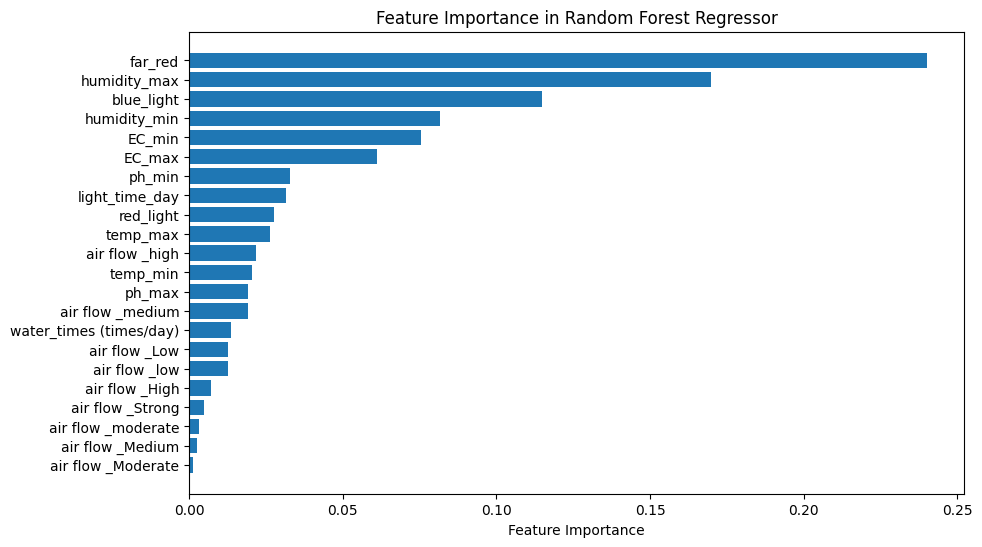

In [142]:
# !pip install matplotlib seaborn scikit-learn pandas numpy
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# !pip install --upgrade scikit-learn
# !pip install imbalanced-learn==0.9.1
from imblearn.under_sampling import RandomUnderSampler
# !pip install --upgrade imbalanced-learn
# !pip install scikit-learn==1.3.0 imbalanced-learn==0.11.0
from imblearn.over_sampling import SMOTE




smote = SMOTE(random_state=42,k_neighbors=5)  # You can adjust the random_state

# Resample the data

undersampler = RandomUnderSampler(random_state=42)  # You can adjust the random_state

# # Resample the data

# Define features and target
X = data_ct[['temp_min','temp_max','EC_min','EC_max', 'light_time_day', 'red_light',
       'blue_light', 'far_red', 'humidity_min','humidity_max', 'ph_min','ph_max', 'water_times (times/day)',
       'air flow ']]  # remove growth_time weeks
y = data_ct['yield_category_encoded']



# One-hot encoding for 'air flow ' column
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_air_flow = encoder.fit_transform(X[['air flow ']])
encoded_air_flow_df = pd.DataFrame(encoded_air_flow, columns=encoder.get_feature_names_out(['air flow ']))
X = X.drop(columns=['air flow '])
X = pd.concat([X, encoded_air_flow_df], axis=1)

X_smotresampled, y_smotresampled = smote.fit_resample(X, y)
X_underresampled, y_underresampled = undersampler.fit_resample(X, y)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=250, random_state=42)  # You can adjust n_estimators
rf_regressor.fit(X_train, y_train)  # n_estimators = 150

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Feature Importance
feature_importances = rf_regressor.feature_importances_
feature_names = X.columns
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest Regressor")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
[[2 4 0 1 1]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [2 2 2 8 7]]
Accuracy: 0.3103448275862069
Precision (macro-averaged): 0.275
Recall (macro-averaged): 0.11666666666666665


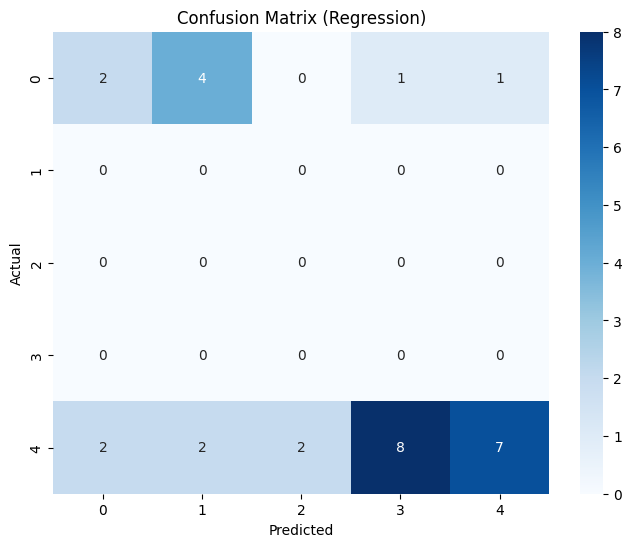

In [143]:
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
num_bins = 5  # Adjust the number of bins as needed
y_test_bins = pd.cut(y_test, bins=num_bins, labels=False)
y_pred_bins = pd.cut(y_pred, bins=num_bins, labels=False)

# 2. Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_bins, y_pred_bins)

# 3. Calculate accuracy
accuracy = accuracy_score(y_test_bins, y_pred_bins)

# 4. Calculate precision (macro-averaged)
precision = precision_score(y_test_bins, y_pred_bins, average='macro')

# 5. Calculate recall (macro-averaged)
recall = recall_score(y_test_bins, y_pred_bins, average='macro')

# Print the metrics
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy}")
print(f"Precision (macro-averaged): {precision}")
print(f"Recall (macro-averaged): {recall}")

# Visualize Confusion Matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Mean Squared Error: 0.15948524222304378
R-squared: 0.24054646560455328
Confusion Matrix:
[[2 2 2 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [1 2 3 3 5]]
Accuracy: 0.35
Precision (macro-averaged): 0.3333333333333333
Recall (macro-averaged): 0.1380952380952381


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


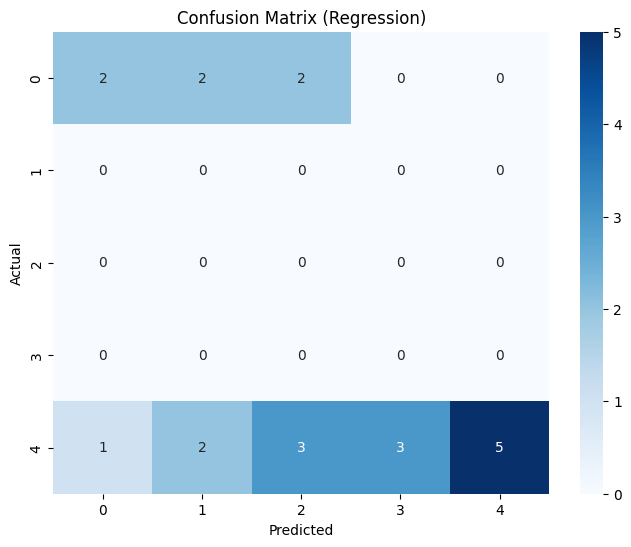

In [137]:
# with grid search

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Load the dataset
# Define features and target
X = data_ct[['temp_min','temp_max','EC_min','EC_max', 'light_time_day', 'red_light',
       'blue_light', 'far_red', 'humidity_min','humidity_max', 'ph_min','ph_max', 'water_times (times/day)',
       'air flow ']] # remove ,'Growth Time (weeks)'
y = data_ct['yield_category_encoded']

# One-hot encoding for 'air flow ' column
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_air_flow = encoder.fit_transform(X[['air flow ']])
encoded_air_flow_df = pd.DataFrame(encoded_air_flow, columns=encoder.get_feature_names_out(['air flow ']))
X = X.drop(columns=['air flow '])
X = pd.concat([X, encoded_air_flow_df], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# grid search for hyperparameters

# Define the parameter grid
param_dist = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10,20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}


# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42,n_estimators=200)


# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_dist, cv=3, scoring='neg_mean_squared_error',n_jobs=-1)
# random_search = RandomizedSearchCV(
#     estimator=rf_regressor,
#     param_distributions=param_dist,  # Use param_distributions
#     n_iter=100,
#     cv=3,
#     scoring='neg_mean_squared_error',
#     random_state=42,
#     n_jobs=-1
# )

# random_search.fit(X_train, y_train)


# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model
# best_rf_regressor = grid_search.best_estimator_

best_rf_regressor = grid_search.best_estimator_


# ----> Prediction and Evaluation <----
# Make predictions on the test set using the best model
y_pred = best_rf_regressor.predict(X_test)

# Evaluate the model (MSE and R-squared)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# ----> Confusion Matrix, Recall, Precision, Accuracy <----
# 1. Discretize (bin) the target variable
num_bins = 5  # Adjust the number of bins as needed
y_test_bins = pd.cut(y_test, bins=num_bins, labels=False)
y_pred_bins = pd.cut(y_pred, bins=num_bins, labels=False)

# 2. Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_bins, y_pred_bins)

# 3. Calculate accuracy
accuracy = accuracy_score(y_test_bins, y_pred_bins)

# 4. Calculate precision (macro-averaged)
precision = precision_score(y_test_bins, y_pred_bins, average='macro')

# 5. Calculate recall (macro-averaged)
recall = recall_score(y_test_bins, y_pred_bins, average='macro')

# Print the metrics
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy}")
print(f"Precision (macro-averaged): {precision}")
print(f"Recall (macro-averaged): {recall}")

# Visualize Confusion Matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()